In [ ]:
using DifferentialEquations, Plots, LinearAlgebra, LaTeXStrings

# Defaults for plotting 
plot_font = "Computer Modern";
default(fontfamily=plot_font,framestyle=:box, label=nothing, grid=false, tickfontsize=7)
scalefontsizes(1.3)

In [143]:
# Params & Grid 

N = 1000 # Dimensionality --> 
xMax = 10 # Spatial extension
x = 2*(-N÷2:N÷2-1)xMax/N # Spatial vector
Δx = x[2]-x[1] # Spatial precision
;

In [144]:
# Constants

# Normalized
ħ=1 # Planck's contant over 2π
k=1 # Spring stiffness
m=1 # Mass
ω=sqrt(k/m) # Angular frequency
;

In [145]:
# Functions 

# Potential (normalized)
function harmonic(x) 
    @. 0.5x^2
end

# Normlization
norm(x)  = x./maximum(abs.(x))
;

In [146]:
V = Diagonal(harmonic(x))
T = Tridiagonal(-1.0*ones(N-1), 2.0 * ones(N), -1.0 * ones(N-1))./(2Δx^2)

# N*N Hamiltonian matrix based on Finite Difference Method
H = T .+ V

# Results

ψs = eigvecs(H) # Eigenfunctions --> probability amplitude
es = eigvals(H) # Eigenvalues --> Energy (normalized)
;

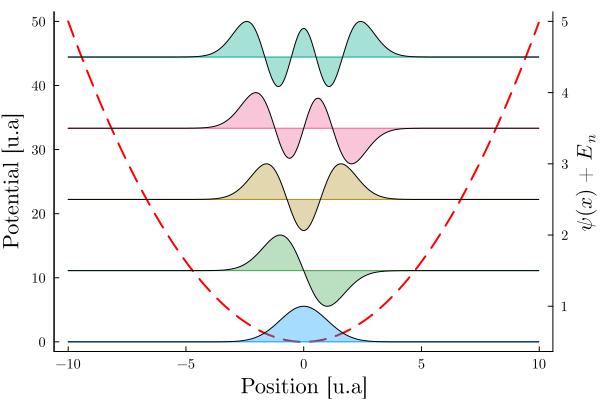

In [147]:
p1=plot(x,harmonic(x),lw=2,color=:red,label="",ls=:dash, ylabel="Potential [u.a]", xlabel="Position [u.a]")
p2=twinx(p1)
plot!(p2,ylabel=L"\psi(x) + E_n")

for n in 1:5
y=es[n] .+ ((ψs[:,n]) |> norm)/2
plot!(p2,x, es[n] .+ 0.0*x, fillrange = y, fillalpha = 0.35, label="")
plot!(p2,x,y, label="", color=:black, bottommargin=3Plots.mm )
end
display(current())

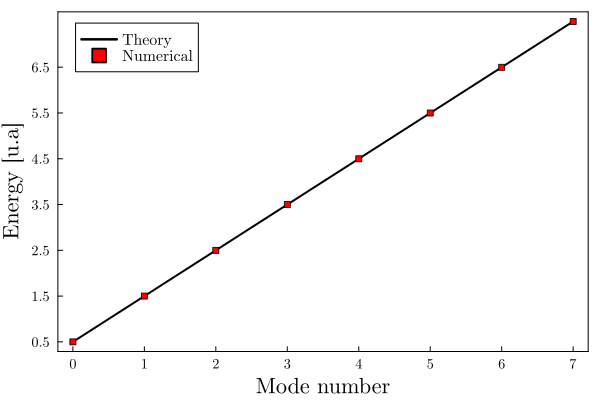

In [150]:
n = 0:7
En = ħ*ω.*(n.+0.5) # Theoretical 
Enum = ħ*ω*es[n.+1] # Numerical
plot(gridalpha=0.8,xticks=n, yticks=(0.5:maximum(Enum)), xlabel="Mode number", ylabel="Energy [u.a]")
plot!(n,En, label="Theory",lw=2, color=:black)
scatter!(n,Enum, label="Numerical", m=:square, mcolor=:red, ms=3)